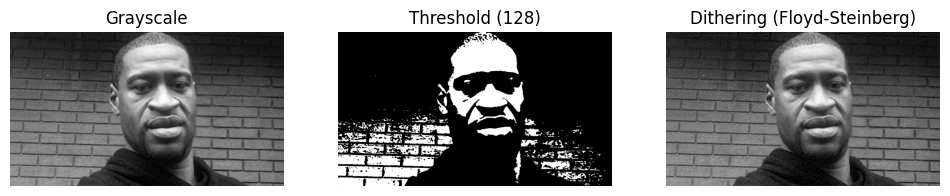

In [28]:
import requests
import numpy as np
import cv2
from matplotlib import pyplot as plt


def get_image_from_url(url):
    response = requests.get(url)
    image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    color_image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
    gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
    return image_array, color_image, gray_image


_, _, gray_image = get_image_from_url("https://e3.365dm.com/20/05/1600x900/skynews-george-floyd-killed-by-police_5001291.jpg?20200616043751")

tresholded_image = gray_image.copy()

for i in range(len(gray_image)):
    for j in range(len(gray_image[0])):
        if tresholded_image[i][j] > 128:
            tresholded_image[i][j] = 255
        else:
            tresholded_image[i][j] = 0

dithered_image = gray_image.copy().astype(np.float32)

for i in range(dithered_image.shape[0] - 1):
    for j in range(1, dithered_image.shape[1] - 1):
        old_pixel = dithered_image[i, j]
        new_pixel = 255 if old_pixel > 128 else 0
        dithered_image[i, j] = new_pixel
        error = old_pixel - new_pixel

        dithered_image[i, j+1]     += error * 1/16
        dithered_image[i+1, j-1]   += error * 1/16
        dithered_image[i+1, j]     += error * 1/16
        dithered_image[i+1, j+1]   += error * 13/16

dithered_image = np.clip(dithered_image, 0, 255).astype(np.uint8)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Grayscale")
plt.imshow(gray_image, cmap='gray')
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Threshold (128)")
plt.imshow(tresholded_image, cmap='gray')
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Dithering (Floyd-Steinberg)")
plt.imshow(dithered_image, cmap='gray')
plt.axis("off")

plt.show()



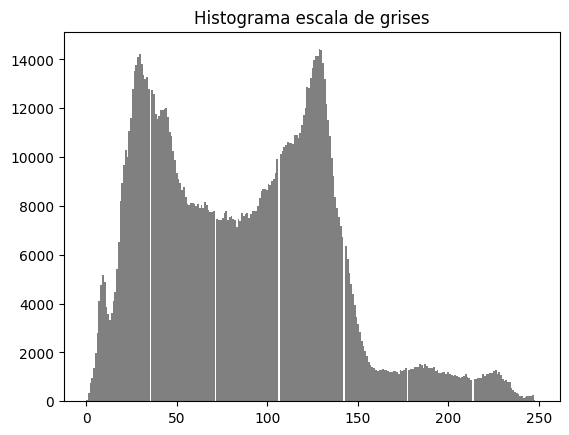

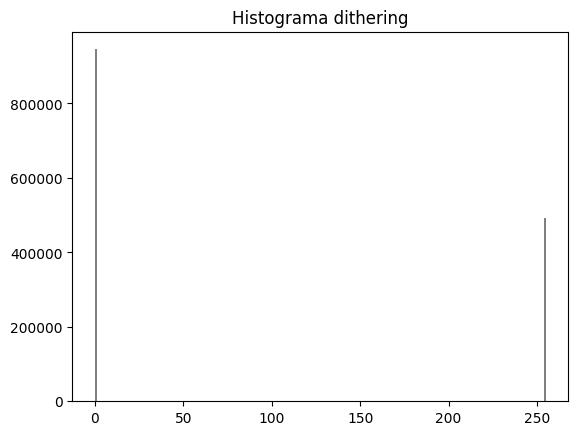

In [23]:
plt.hist(gray_image.ravel(), bins=256, color="gray")
plt.title("Histograma escala de grises")
plt.show()

plt.hist(dithered_image.ravel(), bins=256, color="gray")
plt.title("Histograma dithering")
plt.show()


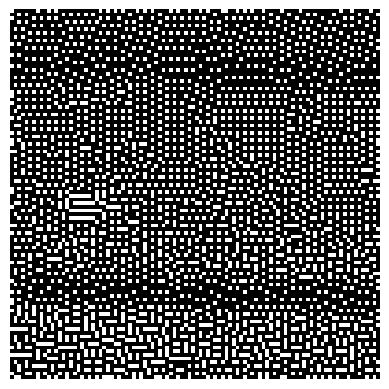

In [26]:
plt.imshow(dithered_image[200:300, 200:300], cmap="gray")
plt.axis("off")
plt.show()
